In [ ]:
import sys
sys.path.append("/home/ecbm4040/Final_Project/e4040-2021Fall-Project-SCNN-as6430-as6456-vsk2123/src/")

In [1]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import utils as np_utils
#from keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, BatchNormalization, Softmax
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
import datetime
from time import time
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.pooling import GlobalAveragePooling2D

In [2]:
# Load and prepare data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
output_size=10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, output_size)
y_test = keras.utils.to_categorical(y_test, output_size)
print(y_train.shape)
print(y_test.shape)



170508288/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 10)
(10000, 10)


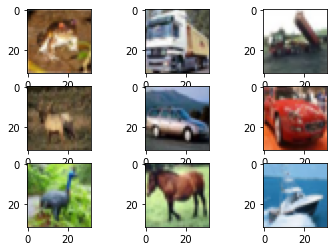

In [ ]:
# Plot sample images before augmentation
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

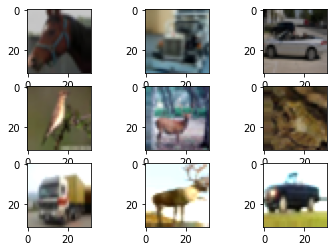

In [3]:
# Data augmentation code

def HSV_perturbations(image):
    """
    Takes an input image and returns it with either the randomly adjusted hue or saturation
    (or may be makes no HSV change at all) with a probability of 1/3
    """
    choice=random.randint(1,3)
    print(choice)
    image = np.array(image)
    if choice ==1:
        return tf.image.random_hue(image, 1/random.randint(1,10))
    elif choice ==2:
        return tf.image.random_saturation(image, 5, 10)
    else:
        return image # so as to avoid not change hue for every image

datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5,1.5]
    )
datagen.fit(x_train)

# Plot sample augmented images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [6]:
# Define CNN model architecture
def spatialCNN():

    model = Sequential()

    model.add(Conv2D(96, kernel_size=(5,5),padding="same", input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(Conv2D(192, kernel_size=(5,5),padding="same"))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(output_size, activation='softmax')) 
    

    return model
    


In [9]:
# Compiling and training the model
batch_size=128
nb_epochs=50

train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

standard_cnn_model = spatialCNN()
print(standard_cnn_model.summary())
standard_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history=standard_cnn_model.fit(x=x_train, y=y_train, batch_size=batch_size,epochs=nb_epochs, validation_data=(x_test, y_test))
history=standard_cnn_model.fit_generator(train_generator,epochs=nb_epochs,steps_per_epoch=len(x_train)//batch_size, validation_data=valid_generator)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 96)        7296      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 192)       460992    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 192)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9408)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


390/390 [==============================] - 71s 180ms/step - loss: 230.4586 - accuracy: 0.3843 - val_loss: 4.7720 - val_accuracy: 0.4555
Epoch 2/50
390/390 [==============================] - 61s 156ms/step - loss: 3.3088 - accuracy: 0.4981 - val_loss: 2.6580 - val_accuracy: 0.5107
Epoch 3/50
390/390 [==============================] - 61s 157ms/step - loss: 2.1594 - accuracy: 0.5310 - val_loss: 1.8330 - val_accuracy: 0.5441
Epoch 4/50
390/390 [==============================] - 62s 160ms/step - loss: 1.6565 - accuracy: 0.5559 - val_loss: 1.5706 - val_accuracy: 0.5579
Epoch 5/50
390/390 [==============================] - 60s 155ms/step - loss: 1.4316 - accuracy: 0.5775 - val_loss: 1.3361 - val_accuracy: 0.5833
Epoch 6/50
390/390 [==============================] - 60s 155ms/step - loss: 1.2827 - accuracy: 0.5971 - val_loss: 1.2900 - val_accuracy: 0.5887
Epoch 7/50
390/390 [==============================] - 60s 155ms/step - loss: 1.2116 - accuracy: 0.6109 - val_loss: 1.2842 - val_accuracy: 0